# Voter System Proposal Simulation

Joshua Sanz, Robert Wang, Victor Han

In [10]:
# a bit of setup
import networkx as nx
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import pandas as pd
import scipy.stats as stats
import time


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from VoterModel import VoterModel
from graphs import *
from vm_change import *

In [12]:
N = 10
er = erdos_renyi(N, 0.5)
#er = complete_graph(N)
#er = cycle(N)
#er = torus_2d(5,2)

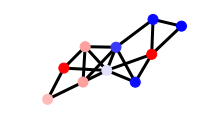

In [13]:
options = {
    'node_color': np.random.rand(N),
    'node_size': 100,
    'width': 3,
    'cmap': 'bwr'
}
plt.subplot(221)
nx.draw(er, **options)

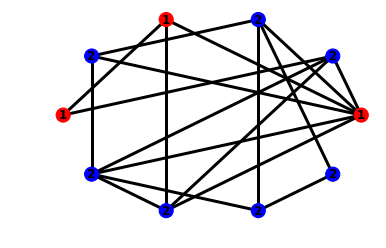

In [17]:
# vm = VoterModel(graph = er, voting='simple', visualization='shell')
# vm = VoterModel(graph = er, voting='probability', visualization='shell')
vm = VoterModel(graph=er, voting='weighted_prob', visualization='shell',
                handicap_b1=1.0, handicap_b2=0.0)
vm.initialize('all_rand_two')
vm.draw()

<IPython.core.display.Javascript object>


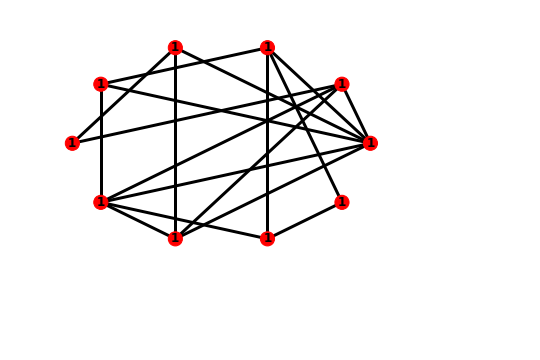

In [22]:
# Here we demonstrate an animation. The resulting animation is also saved to a gif.
# The below magic command is needed for the animation.
%matplotlib notebook
vm.initialize('all_rand_two')
flux_arr = []
belief_arr = []
vm.draw()
plt.show()
for i in range(10):
    cb, ub = vm.update()
    plt.pause(0.5)
    flux_arr, belief_arr = track_changes(cb, ub, flux_arr, belief_arr)
    vm.draw()
vm.save_gif(fps=1, fname='sim.gif')
%matplotlib inline

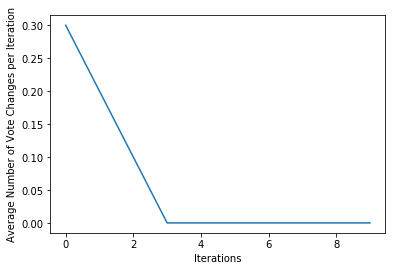

In [23]:
# Plot the average number of belief changes per iteration
plt.figure()
plot_flux(flux_arr)

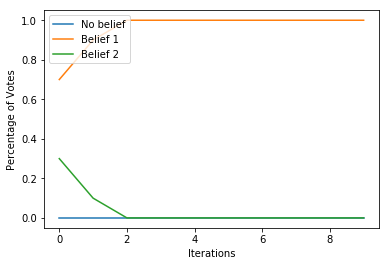

In [24]:
# Plot the distribution of beliefs per iteration
plt.figure()
plot_comparisons(belief_arr)

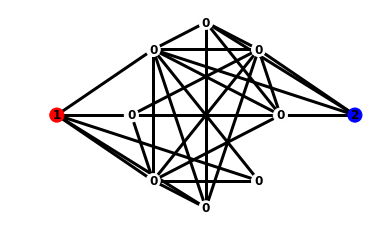

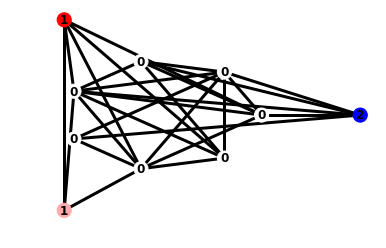

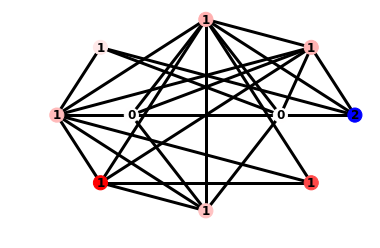

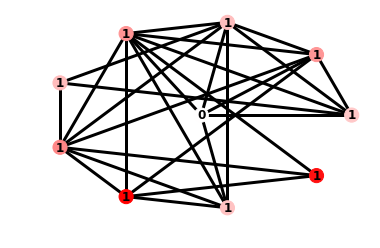

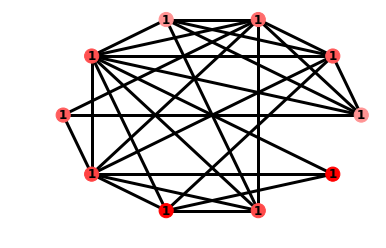

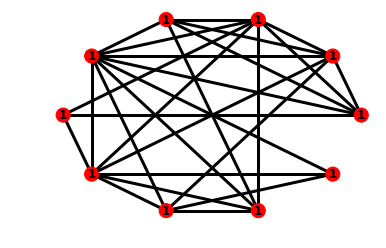

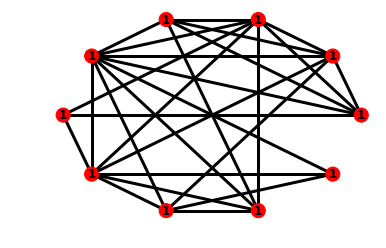

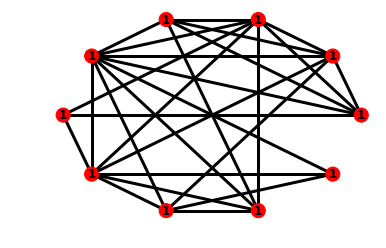

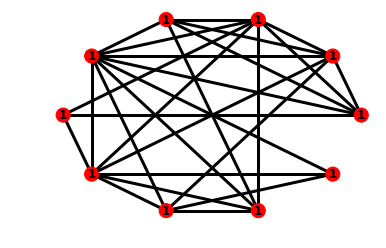

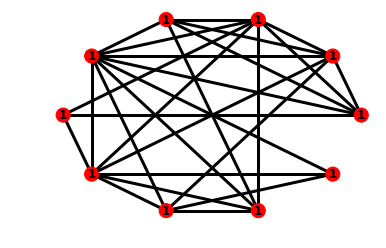

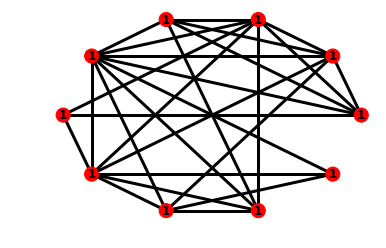

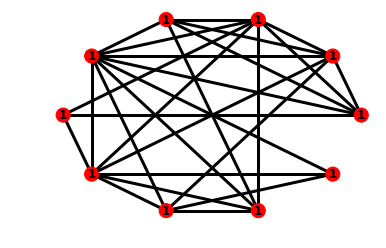

In [9]:
vm.redraw = False # We don't want an animation, and just want a new figure each time
vm.initialize('rand_pair')
flux_arr = []
belief_arr = []

vm.draw()
plt.show()
for i in range(50):
    cb, ub = vm.update()
    flux_arr, belief_arr = track_changes(cb, ub, flux_arr, belief_arr)
    if i % 5 == 0:
        vm.draw()
        plt.show()
vm.draw()
plt.show()
vm.save_gif(fps=1, fname='sim2.gif')

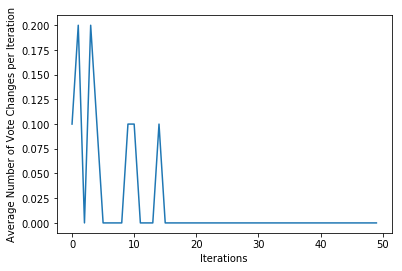

In [10]:
# Plot the average number of belief changes per iteration
plt.figure()
plot_flux(flux_arr)

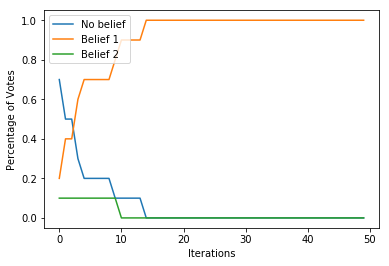

In [11]:
# Plot the distribution of beliefs per iteration
plt.figure()
plot_comparisons(belief_arr)